In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
energy_df = pd.read_csv('energydata_complete.csv')
energy_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

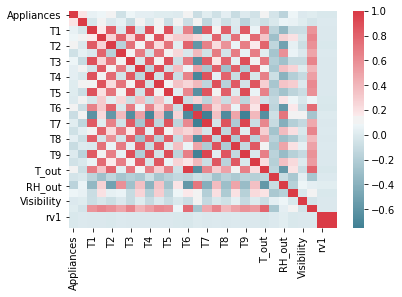

In [4]:
# Compute the correlation matrix
corr = energy_df.corr()

# Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap)

In [5]:
energy_df = energy_df.drop(['date','lights'],axis=1)

In [6]:
scaler = MinMaxScaler()
energy_norm = pd.DataFrame(scaler.fit_transform(energy_df), columns=energy_df.columns)

In [7]:
features = energy_norm.drop(columns=['Appliances'])
target = energy_norm['Appliances']

In [8]:
x= energy_norm['T2'].values.reshape(-1,1)
y= energy_norm['T6']

reg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

reg.fit(x_train, y_train)

pred = reg.predict(x_test)
# pred
# x_test
r2_scoreT = r2_score(y_test, pred)
r2_scoreT

0.6427789637197382

In [8]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [9]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [10]:
train_pred = linear_model.predict(x_train)
# train_lin_mse = mean_squared_error(y_train, train_pred)
# train_lin_mse

In [11]:
val_pred = linear_model.predict(x_test)
lin_mse = mean_squared_error(y_test, val_pred)
lin_mse

0.007658778867195367

In [12]:
rmse = np.sqrt(mean_squared_error(y_test, val_pred))
rmse

0.0875144494766171

In [13]:
mae = mean_absolute_error(y_test, val_pred)
mae

0.050133623977429535

In [14]:
r2_score = r2_score(y_test, val_pred,multioutput='variance_weighted')
r2_score

0.14890246319303535

In [15]:
rss = np.sum(np.square(y_test - val_pred))
rss

45.34762967266377

In [16]:
feature_importance = pd.Series(linear_model.coef_, x_train.columns).sort_values()
feature_importance

RH_2          -0.456698
T_out         -0.321860
T2            -0.236178
T9            -0.189941
RH_8          -0.157595
RH_out        -0.077671
RH_7          -0.044614
RH_9          -0.039800
T5            -0.015657
T1            -0.003281
rv2            0.000770
rv1            0.000770
Press_mm_hg    0.006839
T7             0.010319
Visibility     0.012307
RH_5           0.016006
RH_4           0.026386
T4             0.028981
Windspeed      0.029183
RH_6           0.038049
RH_3           0.096048
T8             0.101995
Tdewpoint      0.117758
T6             0.236425
T3             0.290627
RH_1           0.553547
dtype: float64

In [17]:
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

pred = ridge_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
rmse

0.08753385704628001

In [18]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

pred = lasso_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
rmse

0.09358170467245137